Für dieses Script brauchen wir die Matplotlib und Numpy. Falls diese noch nicht installiert sind, hole dies nach.

In [60]:
# pip install numpy
# pip install matplotlib

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In diesem Script wollen wir die Verformung eines Netzes in 2 Dimensionen mit homogenen Eigenschaften brechnen. Daher legen wir zunächst die Parameter fest.


In [62]:
Lx = 1.0   # Länge in x-Richtung
Ly = 1.0   # Länge in y-Richtung
nx = 10     # Anzahl der Elemente in x-Richtung
ny = 10    # Anzahl der Elemente in y-Richtung
E = 100.0  # Elastizitätsmodul
A = 1.0    # Querschnittsfläche


Einige Parameter ergeben sich logisch aus den gegenbenen Parametern

In [63]:
n_nodes_x = nx + 1
n_nodes_y = ny + 1
n_nodes = n_nodes_x * n_nodes_y

x_coords = np.linspace(0, Lx, n_nodes_x)
y_coords = np.linspace(0, Ly, n_nodes_y)

So auf die Koordinaten der Knoten.

In [64]:
nodes = []
for j in range(n_nodes_y):
    for i in range(n_nodes_x):
        nodes.append((x_coords[i], y_coords[j]))
nodes = np.array(nodes)


Nun erfolgt die Zuordnung der Elemente.
Die Fläche wird hierbei in Quadratische Elemente unterteilt und deren Flächendehnung und Scherungbeanspruchung berechnent. 

In [65]:
elements = []
for j in range(ny):
    for i in range(nx):
        n1 = j * n_nodes_x + i
        n2 = n1 + 1
        n3 = n1 + n_nodes_x
        n4 = n3 + 1
        elements.append([n1, n2, n4, n3])
elements = np.array(elements)

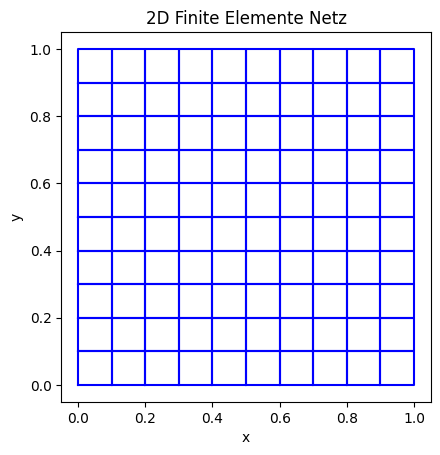

In [66]:
# Plot der Netzstruktur zur Kontrolle
fig, ax = plt.subplots()
for element in elements:
    x = [nodes[element[i]][0] for i in range(4)] + [nodes[element[0]][0]]
    y = [nodes[element[i]][1] for i in range(4)] + [nodes[element[0]][1]]
    ax.plot(x, y, 'b')

ax.set_aspect('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Finite Elemente Netz')
plt.show()